# Plots for paper

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [35]:

import matplotlib.pyplot as plt 
from priors import priors_dict
import numpy as np 
import json
import pandas as pd 
import corner
import scienceplots

def load_data(path,variables_to_plot):


    df_posterior = pd.read_parquet(path)  

    y_post = df_posterior[variables_to_plot].to_numpy()

    # print("Number of samples:",len(df_posterior))
    # print("Truths/Medians/Variances")
    medians = df_posterior[variables_to_plot].median()
    variances = df_posterior[variables_to_plot].var()
    for i in range(len(medians)):
        print(variables_to_plot[i],medians[i],variances[i])
    



    return_code = 0
    if medians[2] < 2.4: #psi is weird / not converged so don't plot it 
        print("Ignoring this file since psi not converged")
        return_code = 1
        
    print('-----------------------------***********************----------------------')
    return y_post, return_code




def stacked_corner(number_of_files_to_plot,variables_to_plot,ranges,injection_parameters,labels,axes_scales,savefig=None,logscale=False):




    list_of_files = sorted(glob.glob("../data/nested_sampling/data_for_manuscript/compressed_files/*.parquet.gzip"))
    

    y = []
    fig= None 
    i = 0

    #while i < number_of_files_to_plot:

    for j in range(len(list_of_files)):
        f = list_of_files[j]
        yi,code = load_data(f,variables_to_plot)

        if code == 0:
            y.extend([yi])
            i += 1

        if i > number_of_files_to_plot:
            break
        
        print(i, f)

    plt.style.use('science')



    for i in range(len(y)):

        k = i 
        if k ==2:
            k = k+1 #convoluted way of skipping C2 color




        if logscale:
            yplot = np.log10(y[i])
            injection_parameters = np.log10(injection_parameters)
            #ranges = np.log10(ranges)
        else:
            yplot = y[i]
        
        print("ranges =", ranges)
        nsamples = len(y[i])
        fig = corner.corner(yplot, 
                            color=f'C{k}',
                            show_titles=True,
                            smooth=True,smooth1d=True,
                            truth_color='C2',
                            quantiles=[0.16, 0.84],
                            truths =injection_parameters ,
                            range=ranges,
                            labels = labels,
                            label_kwargs=dict(fontsize=16),
                            axes_scales = axes_scales,
                            weights = np.ones(nsamples)/nsamples,
                            fig=fig)






        i += 1


    
    if savefig != None:
        plt.savefig(f"../data/images/{savefig}.png", bbox_inches="tight",dpi=300)
        
            


omega_gw 4.999827147679809e-07 2.2638014195530696e-23
phi0_gw 0.19268759265110363 6.599880874274937e-07
psi_gw 2.5966849961211484 4.4019899078406153e-07
iota_gw 0.4747829507368849 0.0007472976078163543
delta_gw 1.002274286079619 2.8623032617893905e-07
alpha_gw 1.0399684517656569 1.7927481972274825e-07
h 9.078656770771012e-13 1.2675363398705126e-28
-----------------------------***********************----------------------
1 ../data/nested_sampling/data_for_manuscript/compressed_files/canonical_model_earth_batch_1245_result.parquet.gzip
omega_gw 4.999939387386809e-07 2.1107146075323037e-23
phi0_gw 0.19365293344427048 6.017072928836188e-07
psi_gw 2.595248419620167 4.3342861123661085e-07
iota_gw 0.3578099443946386 0.0006917036955976366
delta_gw 1.0010898147208505 4.014625451536143e-07
alpha_gw 1.0393637932957944 2.2380767455777805e-07
h 8.665642311937644e-13 6.452216582212375e-29
-----------------------------***********************----------------------
2 ../data/nested_sampling/data_for_m

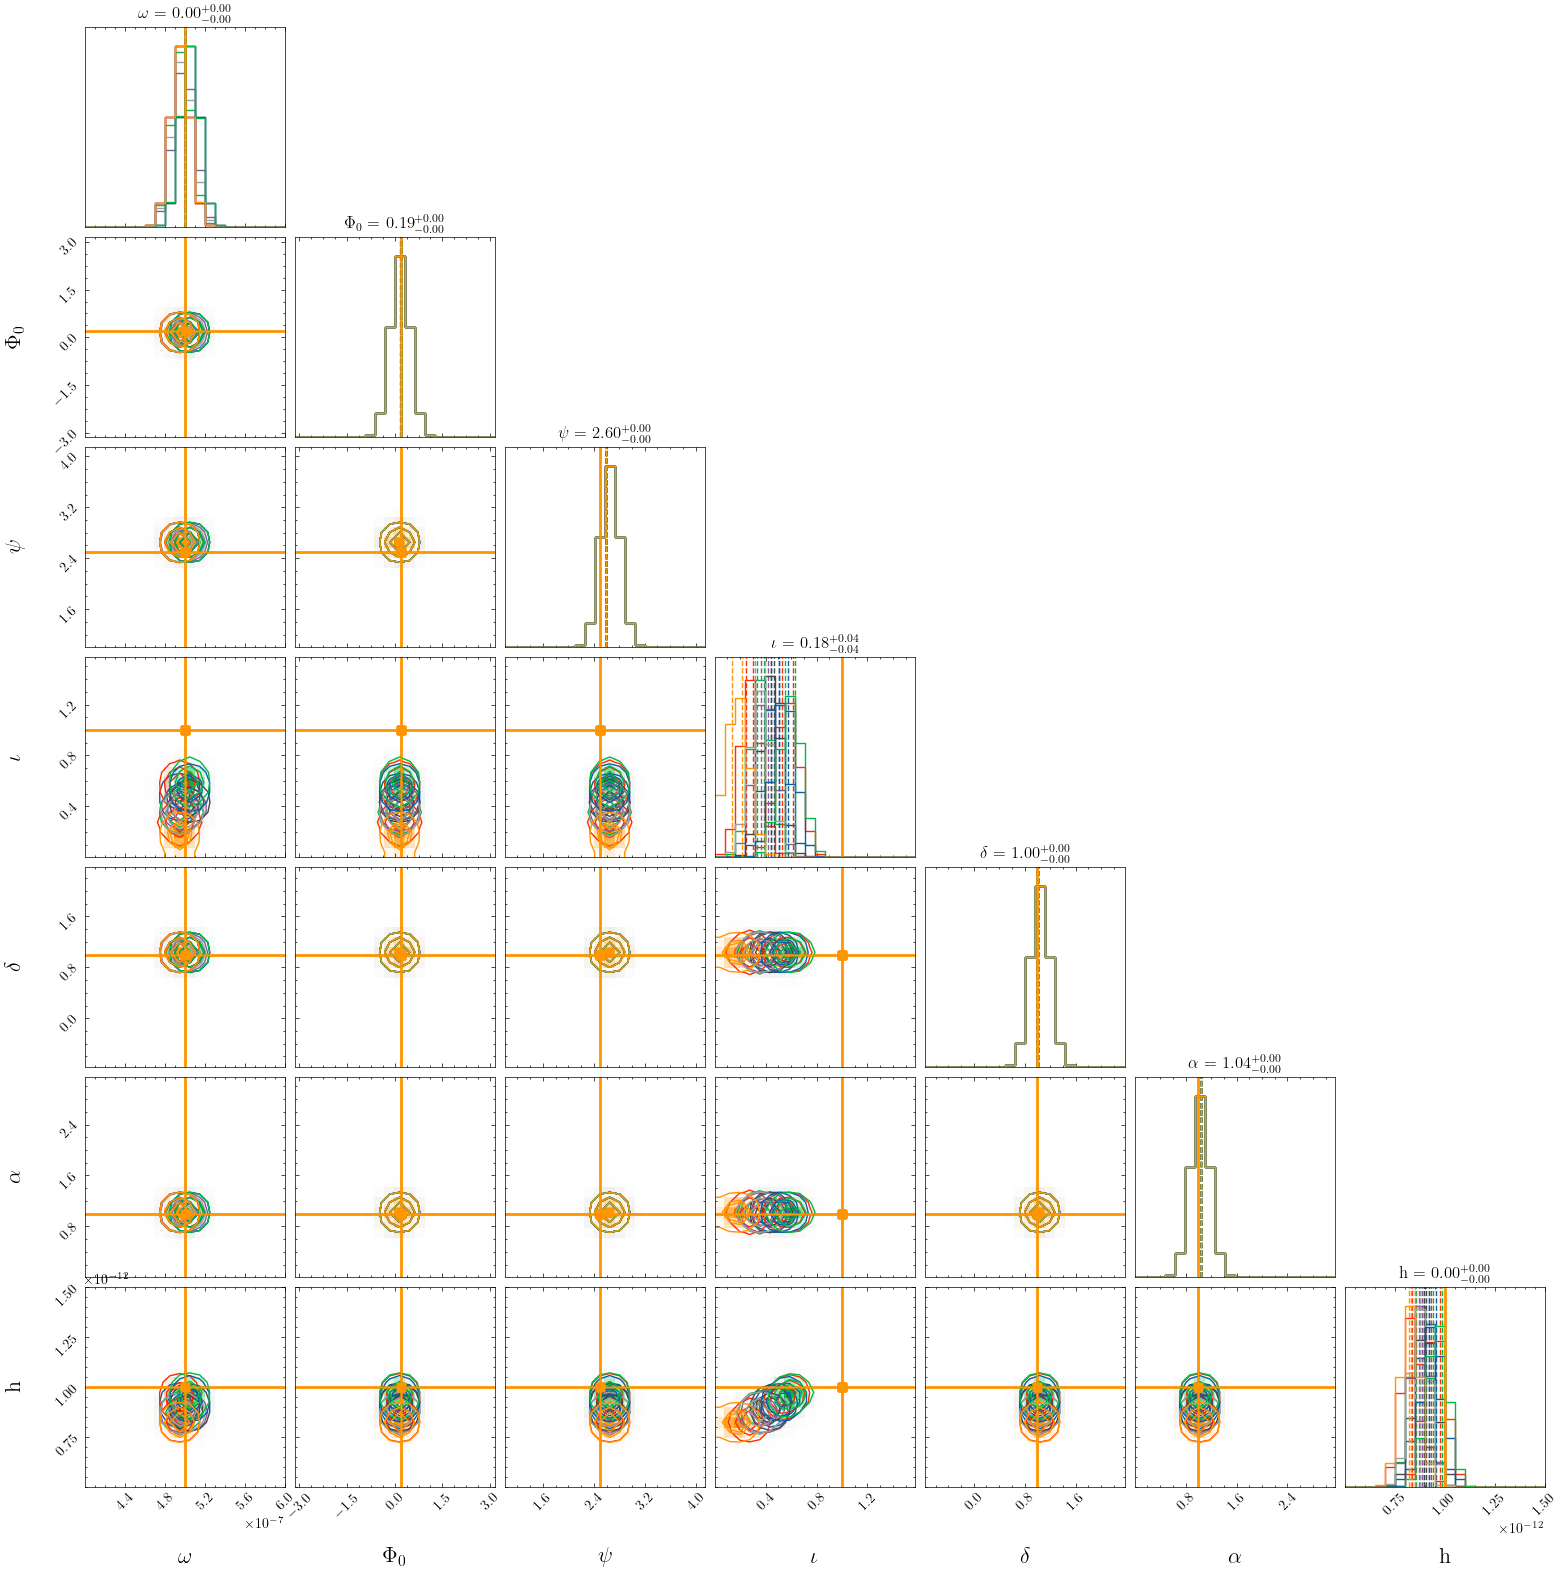

In [37]:
import glob 



variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]

ranges=[(4e-7,6e-7),(-np.pi,np.pi),(0.0+1.0,np.pi+1.0),(0.0,np.pi/2.0),(-np.pi/2 + 0.8,np.pi/2 + 0.8),(0.0,np.pi),(0.5e-12,1.5e-12)]
injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-12]
labels = [r'$\omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'h']
axes_scales = None

number_of_files_to_plot = 9
stacked_corner(number_of_files_to_plot,variables_to_plot,ranges,injection_parameters,labels,axes_scales,savefig="stacked_GW_plot_1000", logscale=False)

Loading data from file: ../data/nested_sampling/scp_dir_noise/noise_batch_1245_result.json
The evidence is: -542235.3962259282
Number of samples: 8854
Truths/Medians/Variances
omega_gw 5.000030048361884e-07 2.0750539634786338e-23
phi0_gw 0.1969840109148716 6.008554274430901e-07
psi_gw 2.59643068790185 6.32532711726685e-07
iota_gw 0.727250216498599 0.001696440412615186
delta_gw 1.0026647892294398 4.79809851931503e-07
alpha_gw 1.0411200561014704 2.602108401507158e-07
h 1.0432236007359134e-12 7.6947465840962715e-28
---------------------------------------------------
Loading data from file: ../data/nested_sampling/scp_dir_noise/noise_batch_1246_result.json
The evidence is: -538301.8875694362
Number of samples: 9818
Truths/Medians/Variances
omega_gw 5.000272884520703e-07 2.2804946758951492e-23
phi0_gw 0.20020649823067377 6.733905611972165e-07
psi_gw 2.597053250057101 2.929535920100646e-07
iota_gw 0.9189336969129986 0.007413420490062122
delta_gw 1.000809959072269 2.8188424607520623e-07
alpha

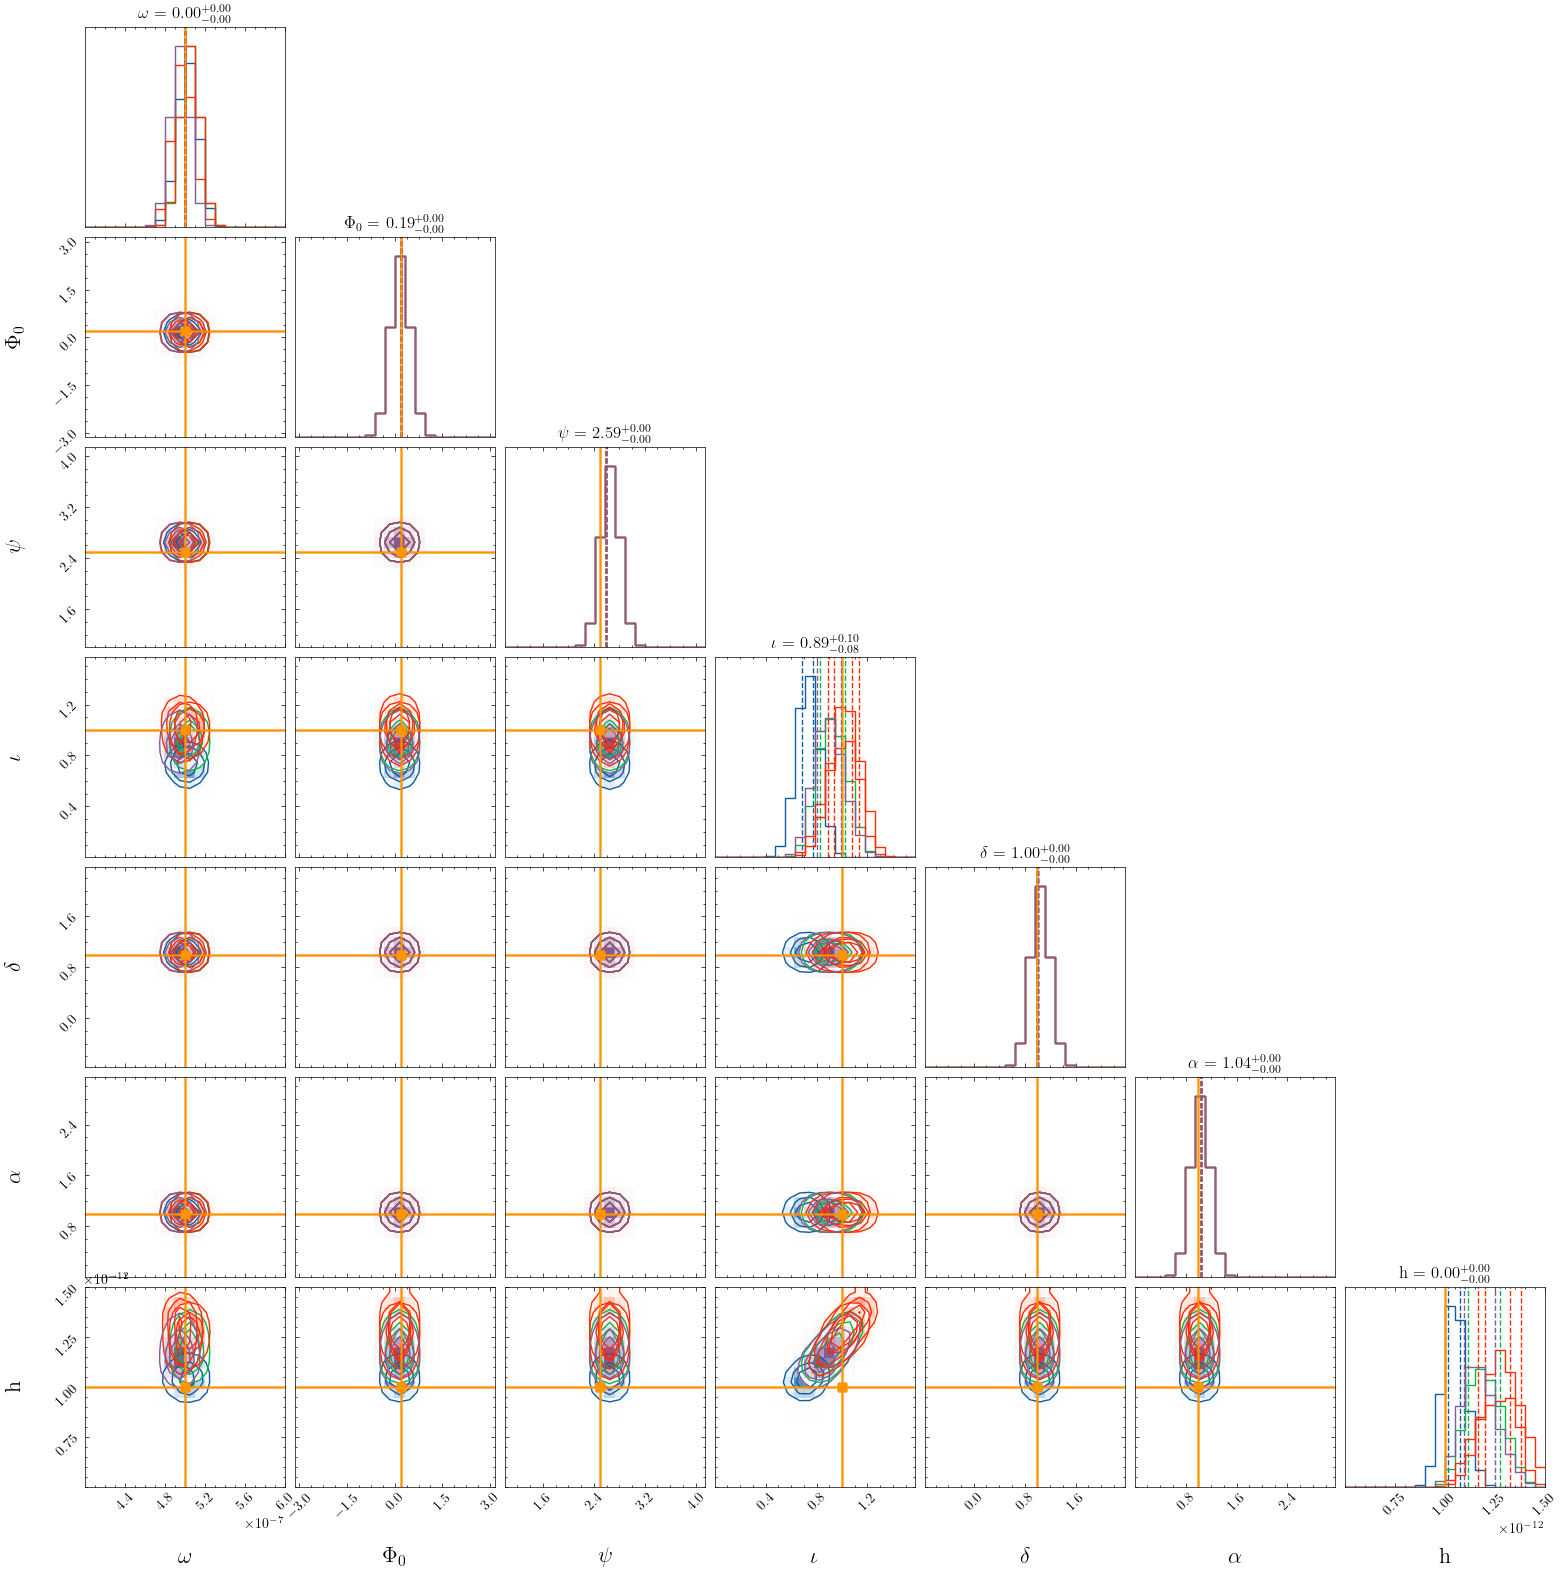

In [ ]:


variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
ranges=[(4e-7,6e-7),(-np.pi,np.pi),(0.0+1.0,np.pi+1.0),(0.0,np.pi/2.0),(-np.pi/2 + 0.8,np.pi/2 + 0.8),(0.0,np.pi),(0.5e-12,1.5e-12)]
injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-12]
labels = [r'$\omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'h']
axes_scales = None

stacked_corner(short_list,variables_to_plot,ranges,injection_parameters,labels,axes_scales,savefig="stacked_GW_plot", logscale=False)

Loading data from file: ../data/nested_sampling/scp_dir_noise/noise_batch_1245_result.json
The evidence is: -542235.3962259282
Number of samples: 8854
Truths/Medians/Variances
f00 330.0197265024523 0.20737294656852678
f01 207.0009214765844 0.11142895982270253
f02 303.3559722277465 1.7075471723546956
f03 328.826447247567 0.1738481543088848
f04 349.5849553874457 2.1833055559496817
---------------------------------------------------
Loading data from file: ../data/nested_sampling/scp_dir_noise/noise_batch_1246_result.json
The evidence is: -538301.8875694362
Number of samples: 9818
Truths/Medians/Variances
f00 330.63559421948025 0.08902444712171481
f01 206.950065209012 0.11172950446554342
f02 302.15961008314775 1.59067134470848
f03 329.5239034761349 0.05349412274311007
f04 347.9765243703281 1.8780820221749257
---------------------------------------------------
Loading data from file: ../data/nested_sampling/scp_dir_noise/noise_batch_1248_result.json
The evidence is: -541937.162588719
Numbe

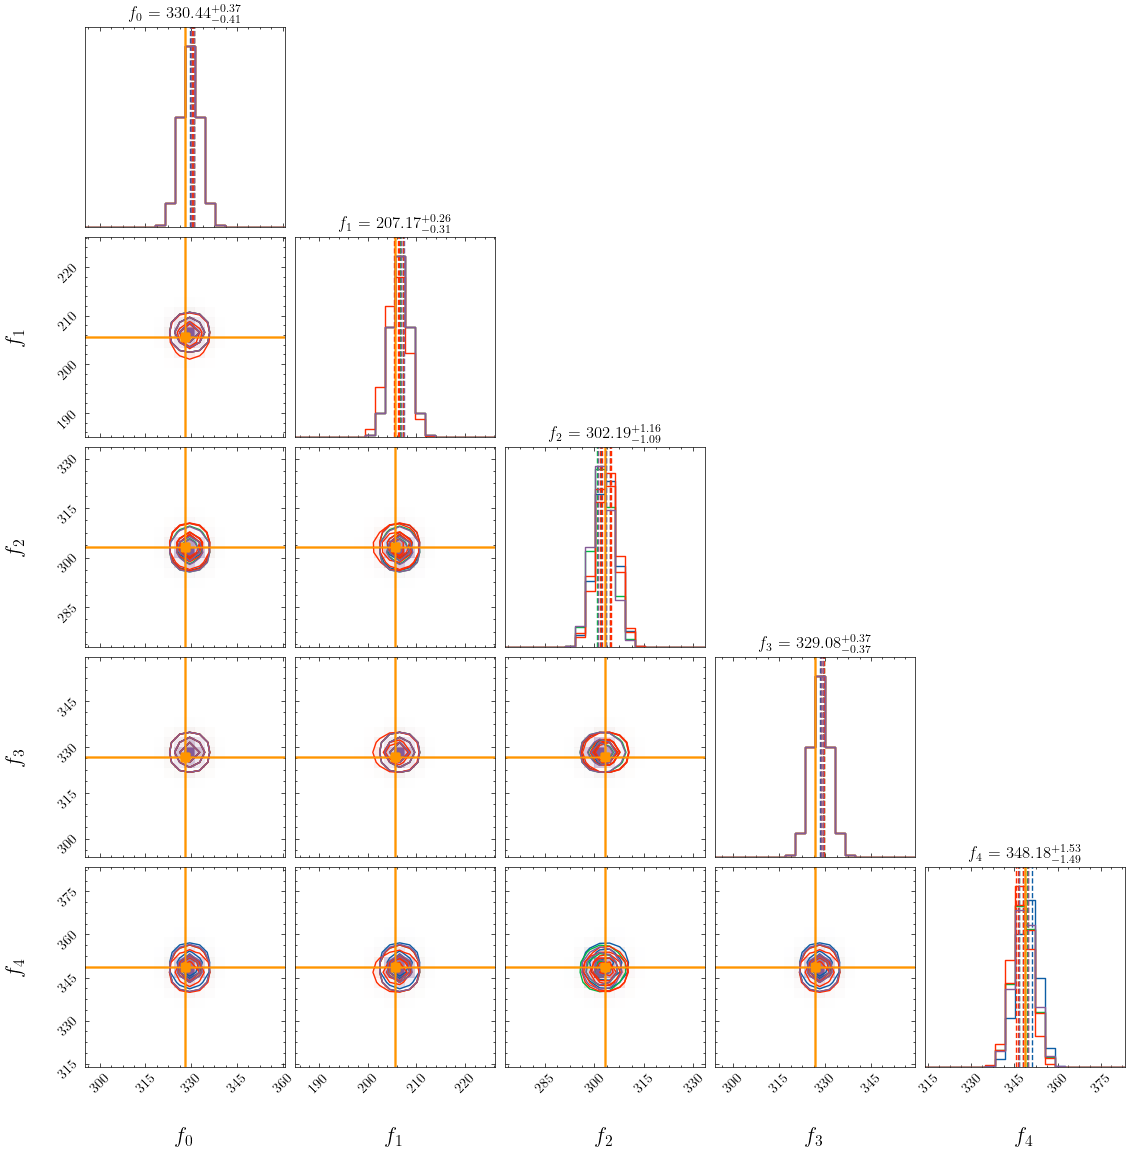

In [ ]:
#Plot f0 
pulsars = pd.read_csv("../data/NANOGrav_pulsars.csv")
true_f = pulsars["F0"].to_numpy()


labels = [r'$f_0$',r'$f_1$',r'$f_2$',r'$f_3$', r'$f_4$']
idx = len(labels)
injection_parameters = true_f[0:idx]
variables_to_plot = ["f00", "f01", "f02", "f03", "f04"]



       # priors[key] = bilby.core.prior.Uniform(f-np.abs(f*tol),f+ np.abs(f*tol), key)

tol =0.1
#ranges = [(i*0.9,i*1.1) for i in injection_parameters]
ranges = [(i-np.abs(i*tol),i+np.abs(i*tol)) for i in injection_parameters]

axes_scales = None
stacked_corner(short_list,variables_to_plot,ranges,injection_parameters,labels,axes_scales,savefig="stacked_f_plot", logscale=False)

Loading data from file: ../data/nested_sampling/scp_dir_noise/noise_batch_1245_result.json
The evidence is: -542235.3962259282
Number of samples: 8854
Truths/Medians/Variances
fdot0 -1.2298241922414264e-15 2.7040480300372246e-35
fdot1 -4.2737853042671244e-16 1.7186136662875805e-36
fdot2 -6.455001882924588e-16 7.463498384921037e-36
fdot3 -1.028233992826649e-15 1.106550324740949e-35
fdot4 -4.166205385037544e-16 1.3139582848800859e-36
---------------------------------------------------
Loading data from file: ../data/nested_sampling/scp_dir_noise/noise_batch_1246_result.json
The evidence is: -538301.8875694362
Number of samples: 9818
Truths/Medians/Variances
fdot0 -1.2292906286248653e-15 2.244714461322888e-35
fdot1 -4.3073484789793853e-16 3.455110574274327e-36
fdot2 -6.433528144262555e-16 2.5144543120072826e-36
fdot3 -1.0211281619164603e-15 1.9173598954354039e-35
fdot4 -4.1948867565222406e-16 2.6850946330807807e-36
---------------------------------------------------
Loading data from file

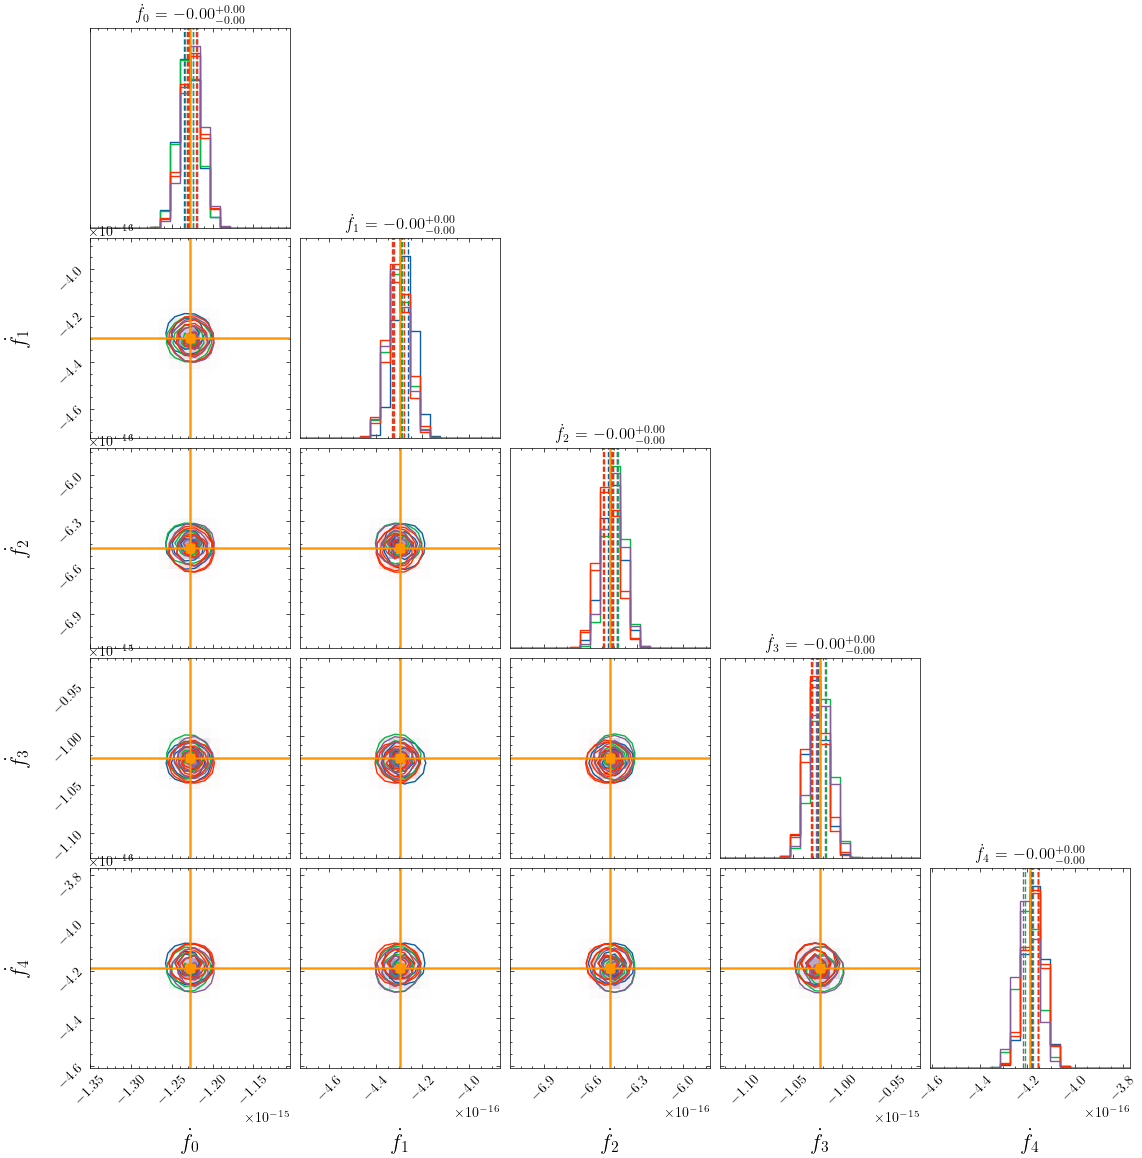

In [ ]:
#Plot f1 
pulsars = pd.read_csv("../data/NANOGrav_pulsars.csv")
true_f = pulsars["F1"].to_numpy()


labels = [r'$\dot{f}_0$',r'$\dot{f}_1$',r'$\dot{f}_2$',r'$\dot{f}_3$', r'$\dot{f}_4$']
idx = len(labels)
injection_parameters = true_f[0:idx]
variables_to_plot = ["fdot0", "fdot1", "fdot2", "fdot3", "fdot4"]

tol = 0.1
ranges = [(i-np.abs(i*tol),i+np.abs(i*tol)) for i in injection_parameters]
axes_scales = None
stacked_corner(short_list,variables_to_plot,ranges,injection_parameters,labels,axes_scales,savefig="stacked_fdto_plot", logscale=False)

Loading data from file: ../data/nested_sampling/scp_dir_noise/noise_batch_1245_result.json
The evidence is: -542235.3962259282
Number of samples: 8854
Truths/Medians/Variances
sigma_p0 1.730898920713319e-20 4.293237284549641e-40
sigma_p1 5.56549582423964e-21 1.6487950115124386e-40
sigma_p2 1.9062529416885185e-20 4.997698077046997e-40
sigma_p3 9.108545730288702e-21 2.3731116450799918e-40
sigma_p4 2.7878982217110425e-21 7.397366816471684e-42
---------------------------------------------------
Loading data from file: ../data/nested_sampling/scp_dir_noise/noise_batch_1246_result.json
The evidence is: -538301.8875694362
Number of samples: 9818
Truths/Medians/Variances
sigma_p0 1.968534931153507e-20 5.287115421059771e-40
sigma_p1 1.8173119737685806e-20 5.195067954741889e-40
sigma_p2 2.9261879208161296e-21 2.5141294697554355e-41
sigma_p3 2.4807684091853698e-20 5.320265902011268e-40
sigma_p4 1.9989891828055048e-20 5.476921194903035e-40
---------------------------------------------------
Loadin

/var/folders/bx/dsrq957n43bckqdm1vkk78yc0000gn/T/ipykernel_47763/3639424903.py:76: RuntimeWarning: invalid value encountered in log10
  injection_parameters = np.log10(injection_parameters)


ranges = [(-22.0, -18.0), (-22.0, -18.0), (-22.0, -18.0), (-22.0, -18.0), (-22.0, -18.0)]
ranges = [(-22.0, -18.0), (-22.0, -18.0), (-22.0, -18.0), (-22.0, -18.0), (-22.0, -18.0)]
ranges = [(-22.0, -18.0), (-22.0, -18.0), (-22.0, -18.0), (-22.0, -18.0), (-22.0, -18.0)]
ranges = [(-22.0, -18.0), (-22.0, -18.0), (-22.0, -18.0), (-22.0, -18.0), (-22.0, -18.0)]


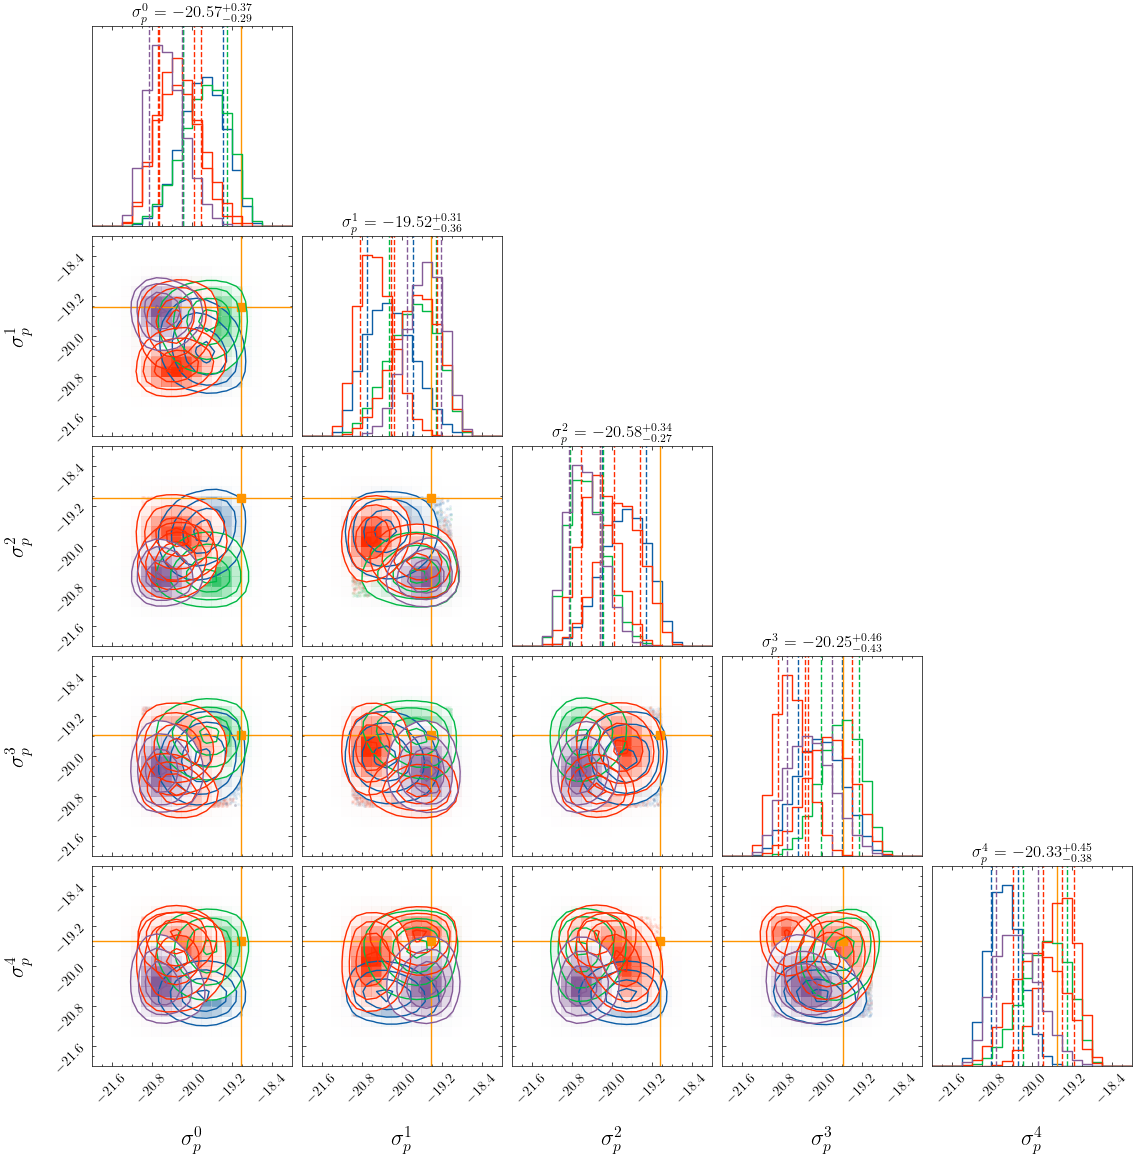

In [ ]:
#Plot sigma p 





#Plot sigma_p, log scaled
generator = np.random.default_rng(1234)
σp = generator.uniform(low = 1e-21,high=1e-19,size=len(true_f))

    
labels = [r'$\sigma_p^0$',r'$\sigma_p^1$',r'$\sigma_p^2$',r'$\sigma_p^3$', r'$\sigma_p^4$']
idx = len(labels)
injection_parameters = σp[0:idx]
variables_to_plot    = ["sigma_p0", "sigma_p1", "sigma_p2", "sigma_p3", "sigma_p4"]




ranges = [(np.log10(1e-22),np.log10(1e-18)) for i in injection_parameters]


stacked_corner(short_list,variables_to_plot,ranges,injection_parameters,labels,axes_scales,savefig="stacked_sgima_p_plot",logscale=True)

### Look over all noise iterations

In [ ]:

def surface_numbers(path):
    # Opening JSON file
    f = open(path)

    # returns JSON object as 
    # a dictionary
    data = json.load(f)

    #Make it a dataframe. Nice for surfacing
    df_posterior = pd.DataFrame(data["posterior"]["content"]) # posterior

    return df_posterior.median()

dfs = []
for f in list_of_files:
    print(f)
    df_i = surface_numbers(f)
    dfs.extend([df_i])


df = pd.concat(dfs)

../data/nested_sampling/scp_dir_noise/noise_batch_1245_result.json
../data/nested_sampling/scp_dir_noise/noise_batch_1246_result.json
../data/nested_sampling/scp_dir_noise/noise_batch_1247_result.json
../data/nested_sampling/scp_dir_noise/noise_batch_1248_result.json
../data/nested_sampling/scp_dir_noise/noise_batch_1249_result.json
../data/nested_sampling/scp_dir_noise/noise_batch_1250_result.json
../data/nested_sampling/scp_dir_noise/noise_batch_1251_result.json
../data/nested_sampling/scp_dir_noise/noise_batch_1252_result.json
../data/nested_sampling/scp_dir_noise/noise_batch_1253_result.json
../data/nested_sampling/scp_dir_noise/noise_batch_1254_result.json
../data/nested_sampling/scp_dir_noise/noise_batch_1255_result.json
../data/nested_sampling/scp_dir_noise/noise_batch_1256_result.json
../data/nested_sampling/scp_dir_noise/noise_batch_1257_result.json
../data/nested_sampling/scp_dir_noise/noise_batch_1258_result.json
../data/nested_sampling/scp_dir_noise/noise_batch_1259_result.

In [ ]:
dfs_new = []


for df in dfs:
    df_i = df.to_frame().transpose()
    dfs_new.extend([df_i])


df = pd.concat(dfs_new)
df = df.reset_index()
df.to_pickle("../data/multiple_noise_realisations")
df = pd.read_pickle("../data/multiple_noise_realisations")

In [ ]:
df

,index,omega_gw,phi0_gw,psi_gw,iota_gw,delta_gw,alpha_gw,h,f00,f01,...,distance40,distance41,distance42,distance43,distance44,distance45,distance46,sigma_m,log_likelihood,log_prior
0,0,5.000030e-07,0.196984,2.596431,0.727250,1.002665,1.041120,1.043224e-12,330.019727,207.000921,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,-542061.630255,3877.692860
1,0,5.000273e-07,0.200206,2.597053,0.918934,1.000810,1.040558,1.190391e-12,330.635594,206.950065,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,-538145.014889,3874.631149
2,0,4.999990e-07,0.188677,0.866019,0.950274,0.940751,2.529194,1.246488e-12,330.467404,206.431243,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,-858092.273134,3890.766971
3,0,4.999972e-07,0.194313,2.596071,1.019074,1.000140,1.040660,1.275363e-12,330.550958,206.824128,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,-541747.146908,3879.641092
4,0,5.000119e-07,0.196905,2.595253,1.014554,1.001111,1.038777,1.272816e-12,330.211842,205.769455,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,-540072.831420,3878.734540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,4.999936e-07,0.188036,0.866489,0.483578,0.940288,2.532076,9.336775e-13,330.715359,206.246397,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,-861540.792609,3877.920072
96,0,5.000127e-07,0.197971,2.600301,0.909062,1.004981,1.042118,1.181169e-12,330.125051,206.607541,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,-540741.762114,3872.830661
97,0,5.000269e-07,0.200866,2.594569,1.175423,1.003185,1.039497,1.414339e-12,329.241177,207.203396,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,-543181.811058,3873.864655
98,0,5.000379e-07,0.202983,2.596715,1.044418,1.002017,1.039869,1.299242e-12,330.635438,207.316547,...,6.000000e+10,1.800000e+11,9.708667e+10,1.587000e+11,8.630000e+10,1.666655e+11,1.011000e+11,1.000000e-11,-540118.005663,3885.289006


In [ ]:


import numpy as np 
import scienceplots


def stacked_histogram(df,parameters,labels,injection_parameters,ranges,index_log_axes,x_upper_limit,savefig):



    plt.style.use('science')


    h,w = 8,20
    rows = len(parameters)
    cols = 1
    fig, axes_object = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=True)
        


    axes = fig.get_axes()


    fs=18

    for i in range(len(parameters)):
        p = parameters[i]
        ax = axes[i]
        
        df[p].hist(ax=ax,bins=20,orientation="horizontal",align="left")


        ax.set_ylabel(labels[i], fontsize=fs)
        ax.xaxis.set_tick_params(labelsize=fs-4)
        ax.yaxis.set_tick_params(labelsize=fs-4)
        ax.grid(False)
        ax.set_xlim(0,x_upper_limit)
        ax.set_ylim(ranges[i])

        ax.axhline(injection_parameters[i],c='C2', linestyle='--')



    for i in index_log_axes:
        axes[i].set_yscale('log') 
        axes[i].set_yscale('log') 
    


    axes[-1].set_xlabel('Counts', fontsize=fs)


    plt.subplots_adjust(hspace=0.0)



    if savefig != None:
        plt.savefig(f"../data/images/{savefig}.png", bbox_inches="tight",dpi=300)







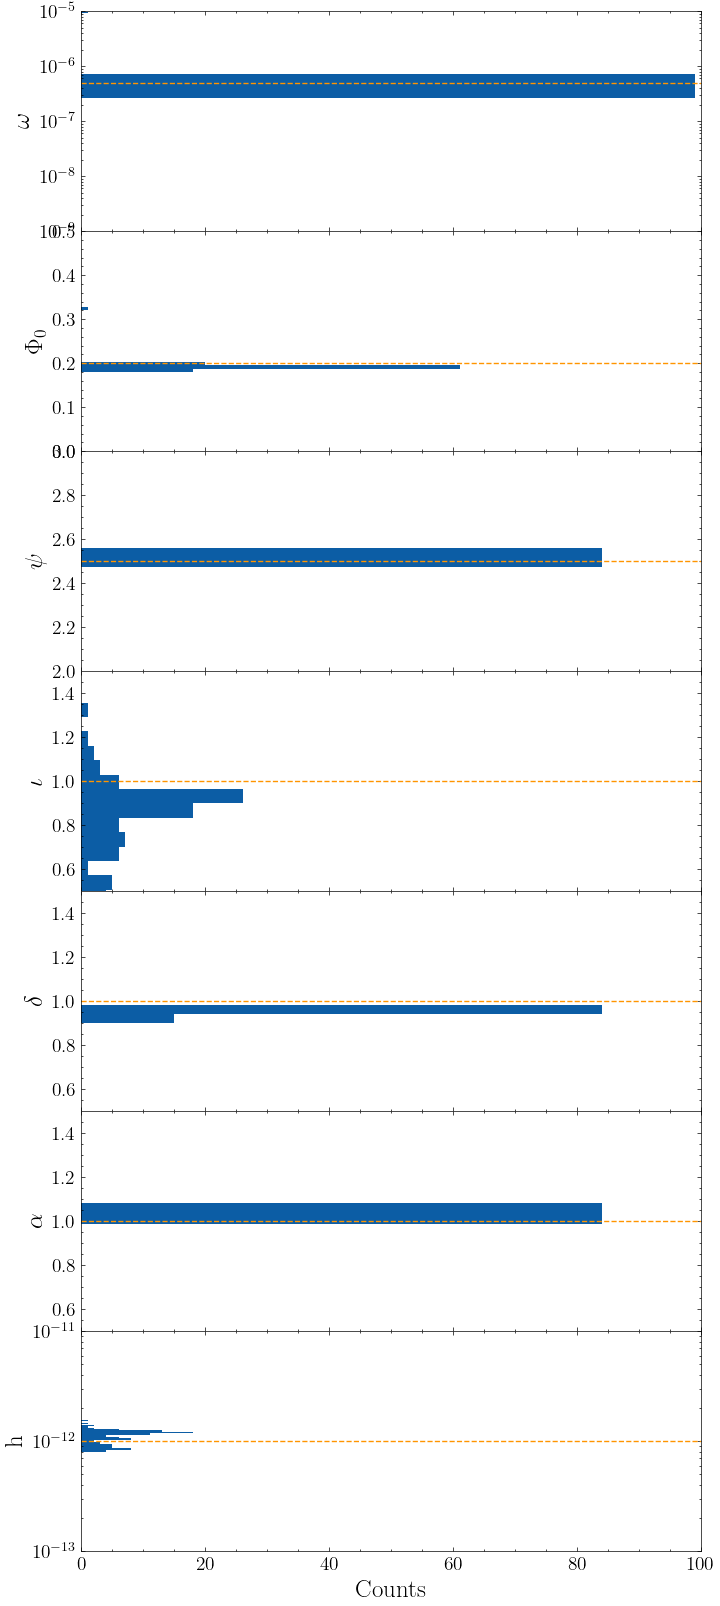

In [ ]:
parameters = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw","h",]
labels = [r'$\omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'h']
injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-12]
ranges=[(1e-9,1e-5),(0.0,0.50),(2.0,3.0),(0.5,1.5),(0.5,1.5),(0.5,1.5),(1e-13,1e-11)]
index_log_axes = [0,-1]

stacked_histogram(df,parameters,labels,injection_parameters,ranges,index_log_axes,x_upper_limit=100,savefig='parameter_medians')

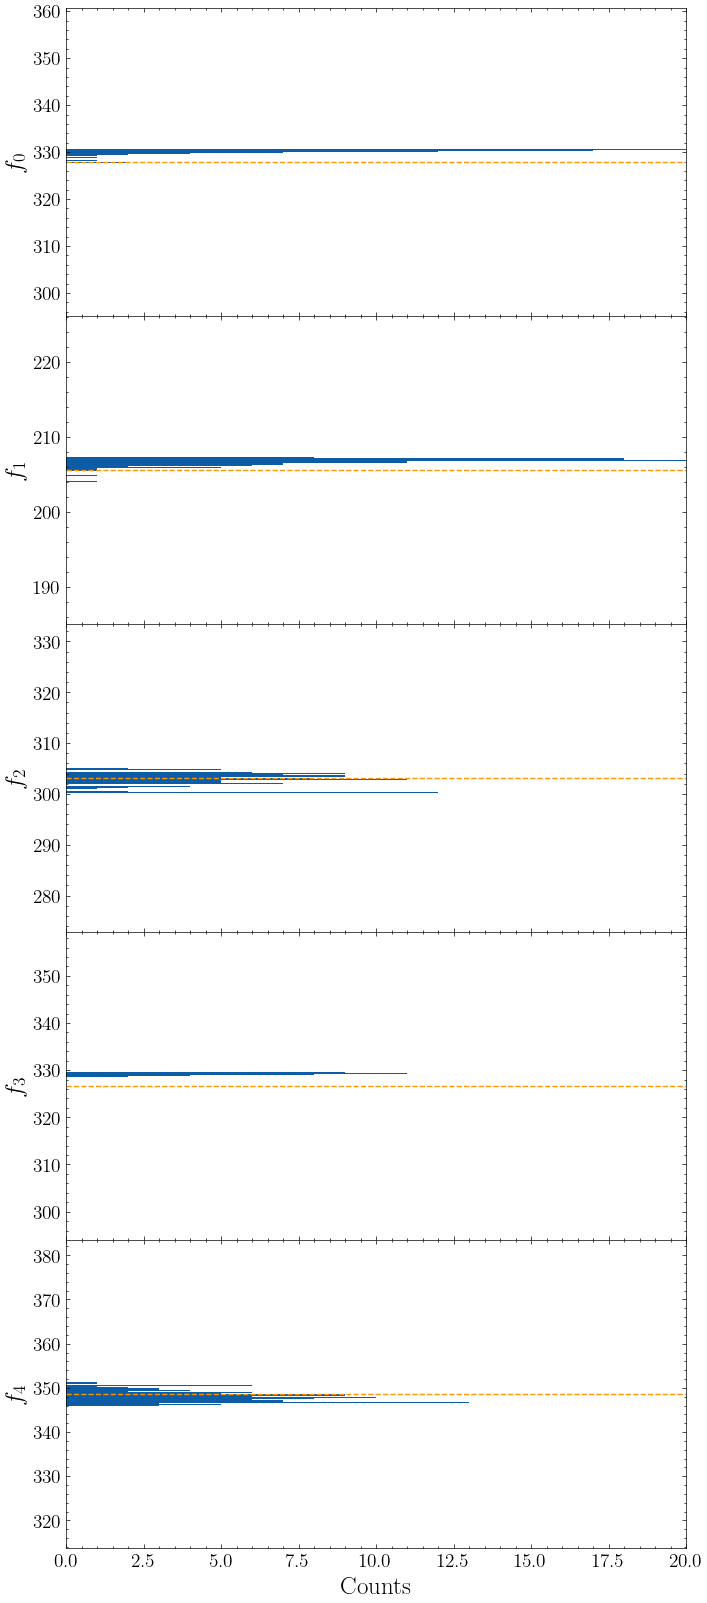

In [ ]:
#Plot f0 
pulsars = pd.read_csv("../data/NANOGrav_pulsars.csv")
true_f = pulsars["F0"].to_numpy()




parameters = ["f00", "f01", "f02", "f03", "f04"]
labels = [r'$f_0$',r'$f_1$',r'$f_2$',r'$f_3$', r'$f_4$']
idx = len(labels)
injection_parameters = true_f[0:idx]

tol =0.1
ranges = [(i-np.abs(i*tol),i+np.abs(i*tol)) for i in injection_parameters]
index_log_axes = []
stacked_histogram(df,parameters,labels,injection_parameters,ranges,index_log_axes,x_upper_limit=20,savefig='parameter_medians_f')

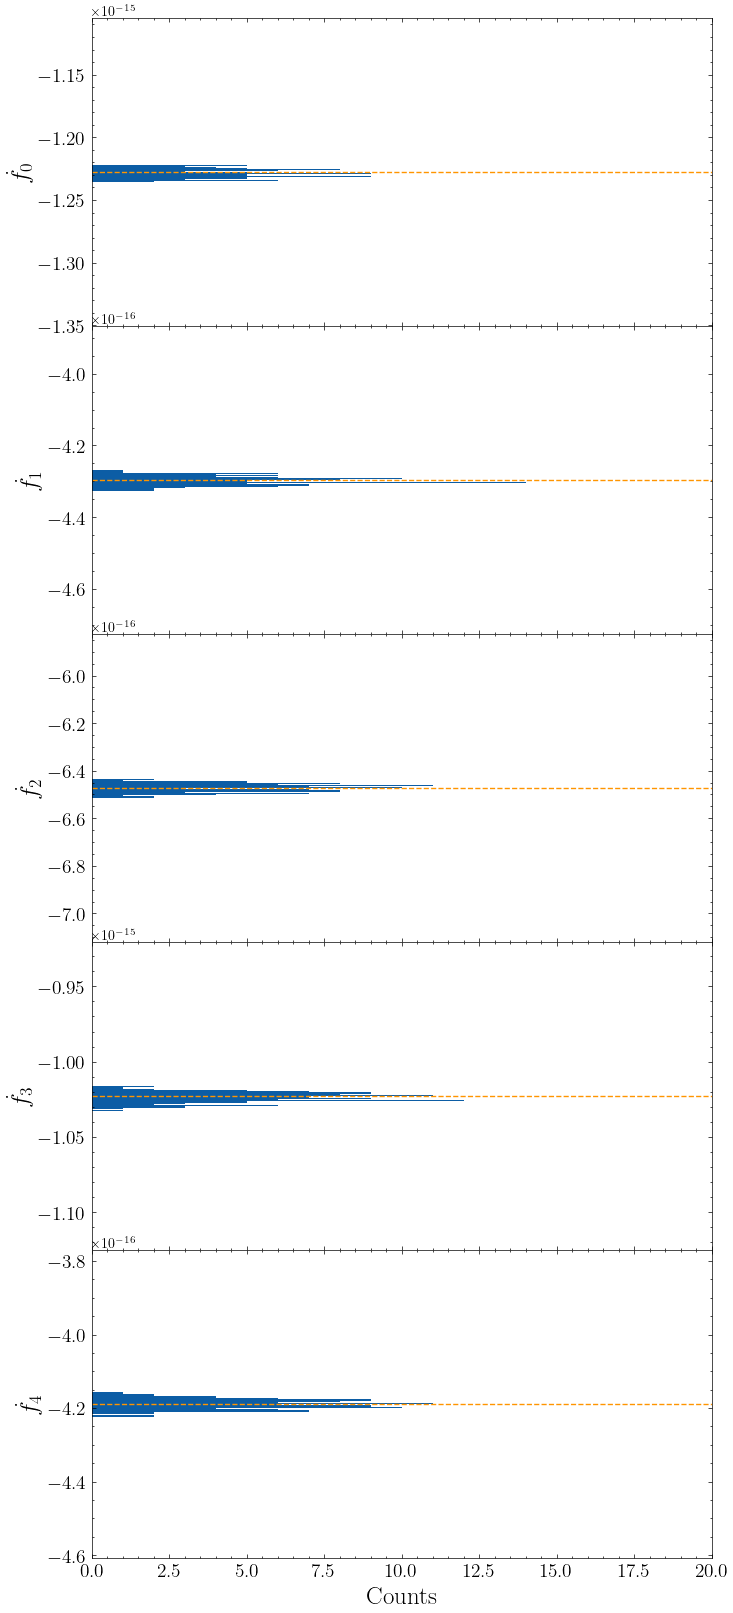

In [ ]:
#Plot f0 
pulsars = pd.read_csv("../data/NANOGrav_pulsars.csv")
true_f = pulsars["F1"].to_numpy()





parameters = ["fdot0", "fdot1", "fdot2", "fdot3", "fdot4"]
labels = [r'$\dot{f}_0$',r'$\dot{f}_1$',r'$\dot{f}_2$',r'$\dot{f}_3$', r'$\dot{f}_4$']
idx = len(labels)
injection_parameters = true_f[0:idx]

tol =0.1
ranges = [(i-np.abs(i*tol),i+np.abs(i*tol)) for i in injection_parameters]
index_log_axes = []
stacked_histogram(df,parameters,labels,injection_parameters,ranges,index_log_axes,x_upper_limit=20,savefig='parameter_medians_fdot')

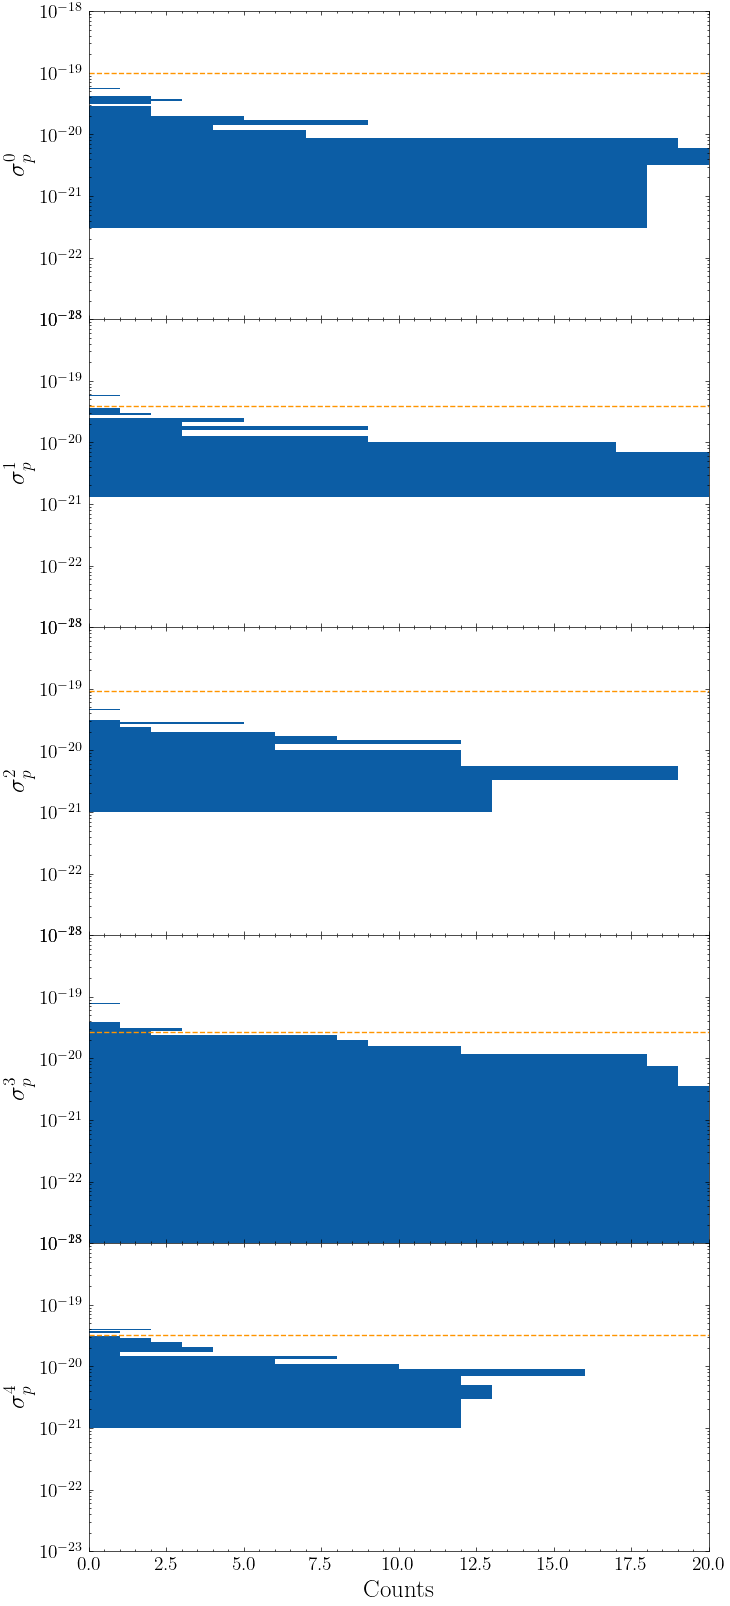

In [ ]:



#Plot sigma_p, log scaled
generator = np.random.default_rng(1234)
σp = generator.uniform(low = 1e-21,high=1e-19,size=len(true_f))

    
labels = [r'$\sigma_p^0$',r'$\sigma_p^1$',r'$\sigma_p^2$',r'$\sigma_p^3$', r'$\sigma_p^4$']
idx = len(labels)
injection_parameters = σp[0:idx]
parameters    = ["sigma_p0", "sigma_p1", "sigma_p2", "sigma_p3", "sigma_p4"]




ranges = [(1e-23,1e-18) for i in injection_parameters]


index_log_axes = [0,1,2,3,4]

stacked_histogram(df,parameters,labels,injection_parameters,ranges,index_log_axes,x_upper_limit=20,savefig='parameter_medians_sigma_p')



In [ ]:


import numpy as np 
import scienceplots


def single_histogram(df,parameter,label,injection_parameter,ranges,log_axes,savefig):



    plt.style.use('science')


    h,w = 10,10
    rows = 1
    cols = 1
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=True)
        


  


    fs=18


    df[parameter].hist(ax=ax,bins=20,orientation="vertical",align="left")

   


    ax.set_xlabel(label, fontsize=fs)
        
    ax.xaxis.set_tick_params(labelsize=fs-4)
    ax.yaxis.set_tick_params(labelsize=fs-4)
    ax.grid(False)
    
    #ax.set_ylim(0,y_upper_limit)
    ax.set_xlim(ranges)
    if log_axes:
      ax.set_xscale('log')

    ax.axvline(injection_parameter,c='C2', linestyle='--')

    ax.set_ylabel('Counts', fontsize=fs)


    if savefig != None:
        plt.savefig(f"../data/images/{savefig}.png", bbox_inches="tight",dpi=300)







# Generate single histograms for all parameters

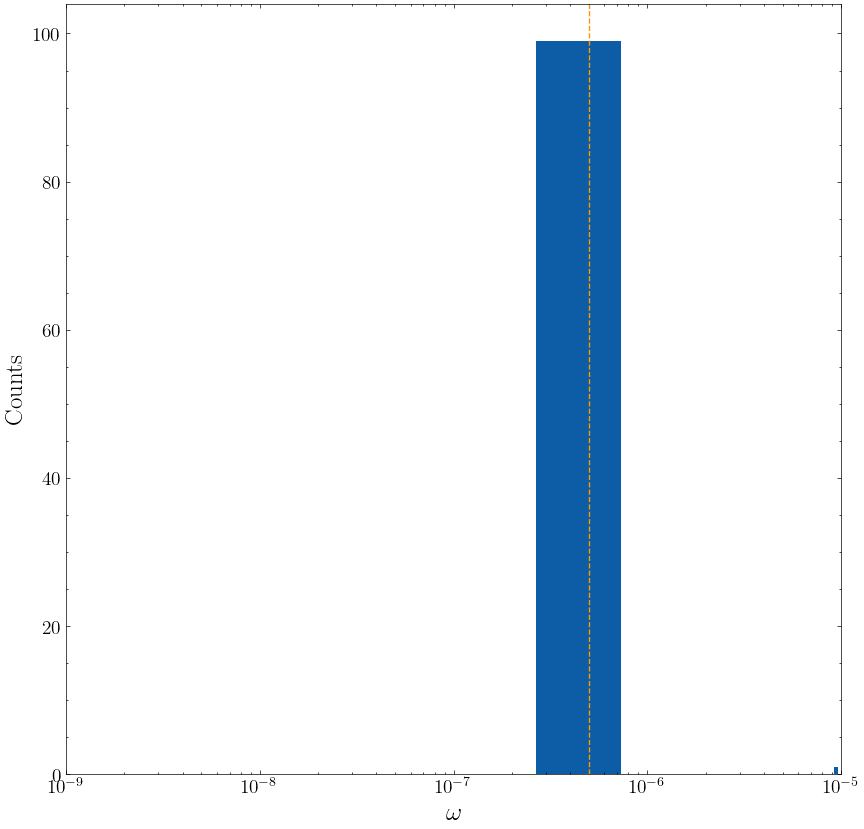

In [ ]:
single_histogram(df,parameter="omega_gw",label=r"$\omega$",injection_parameter=5e-7,ranges=(1e-9,1e-5),log_axes=True,savefig=None)

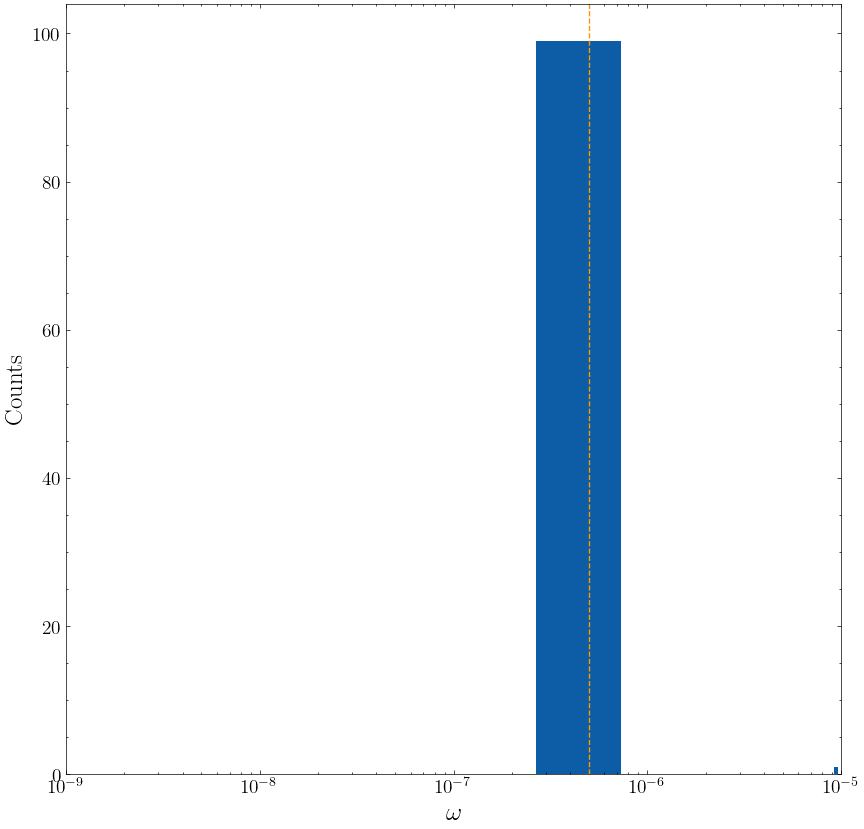

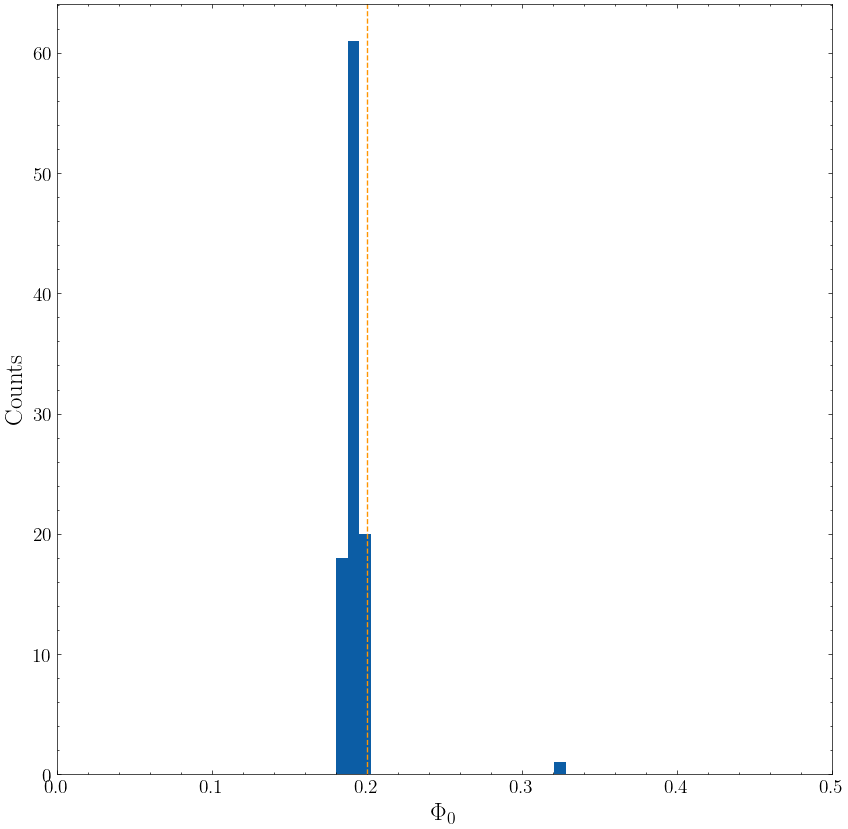

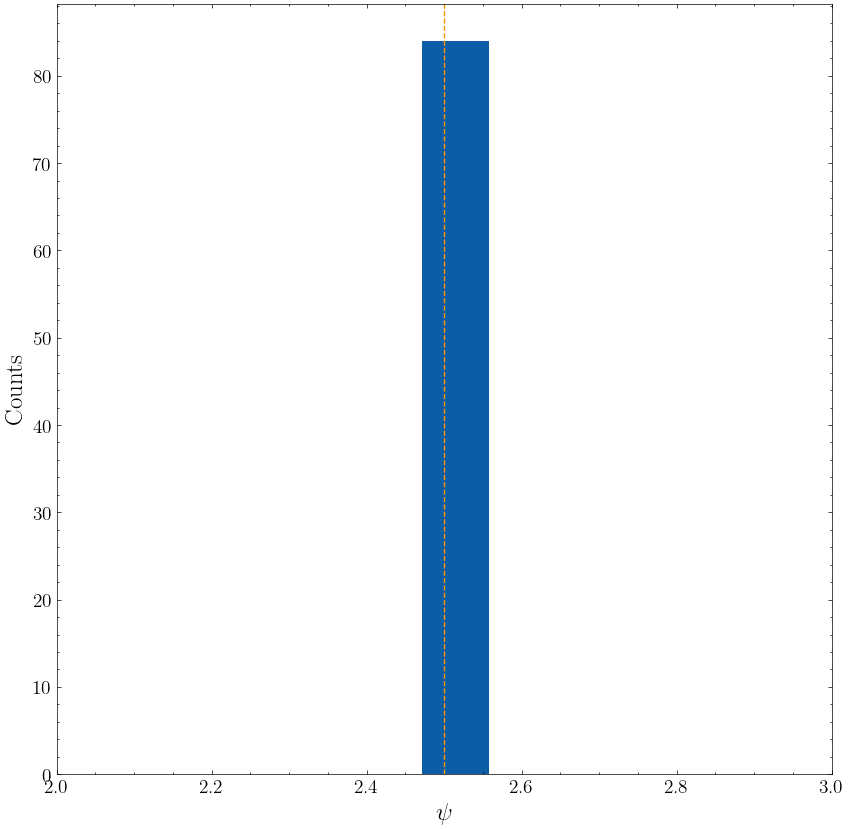

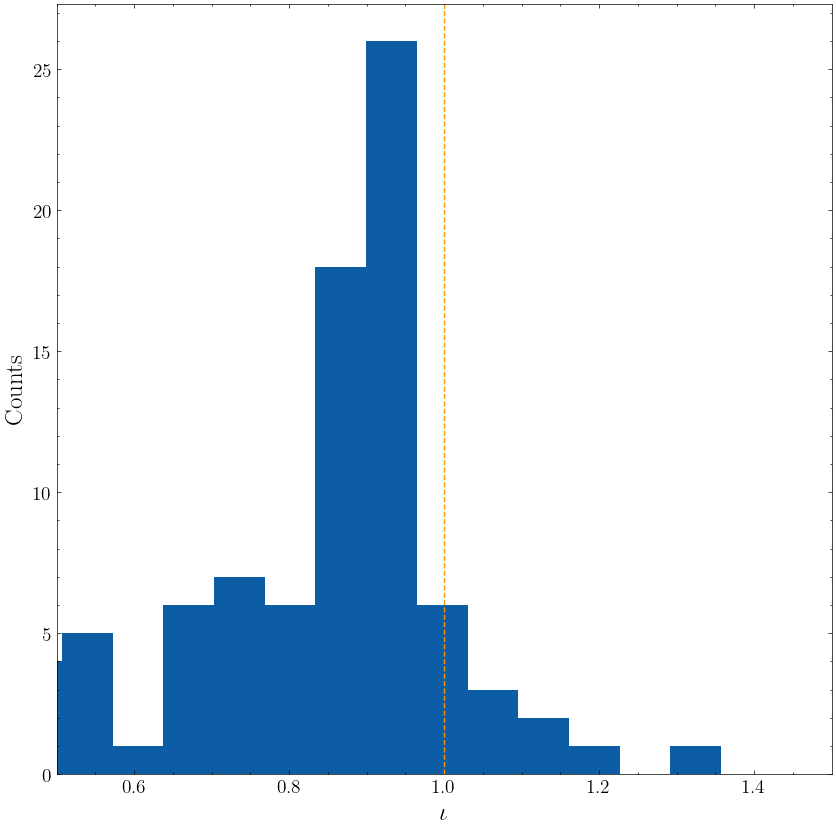

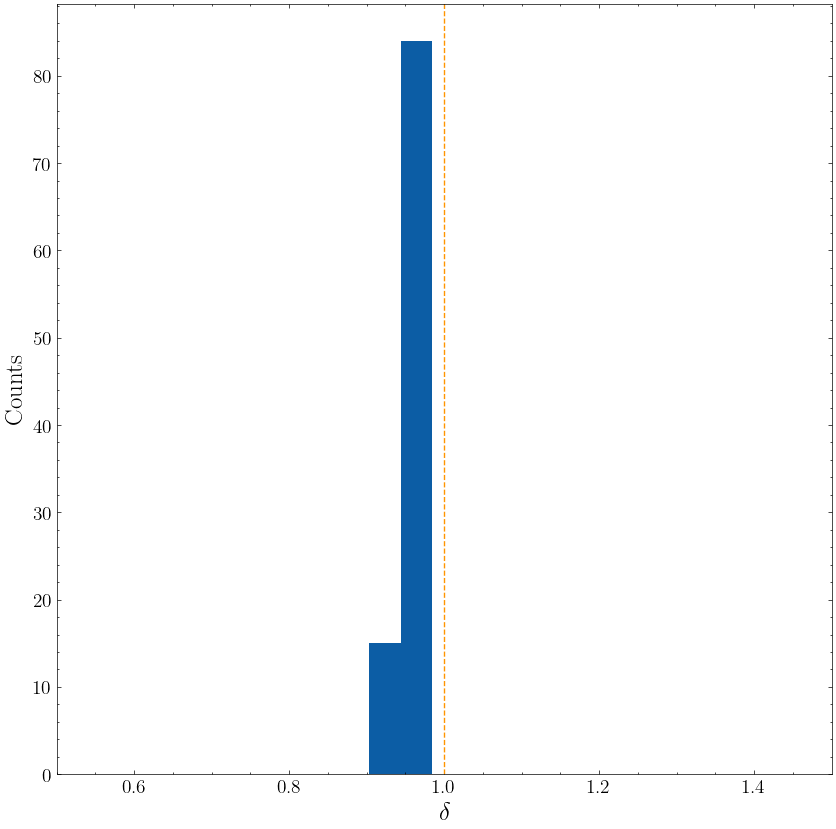

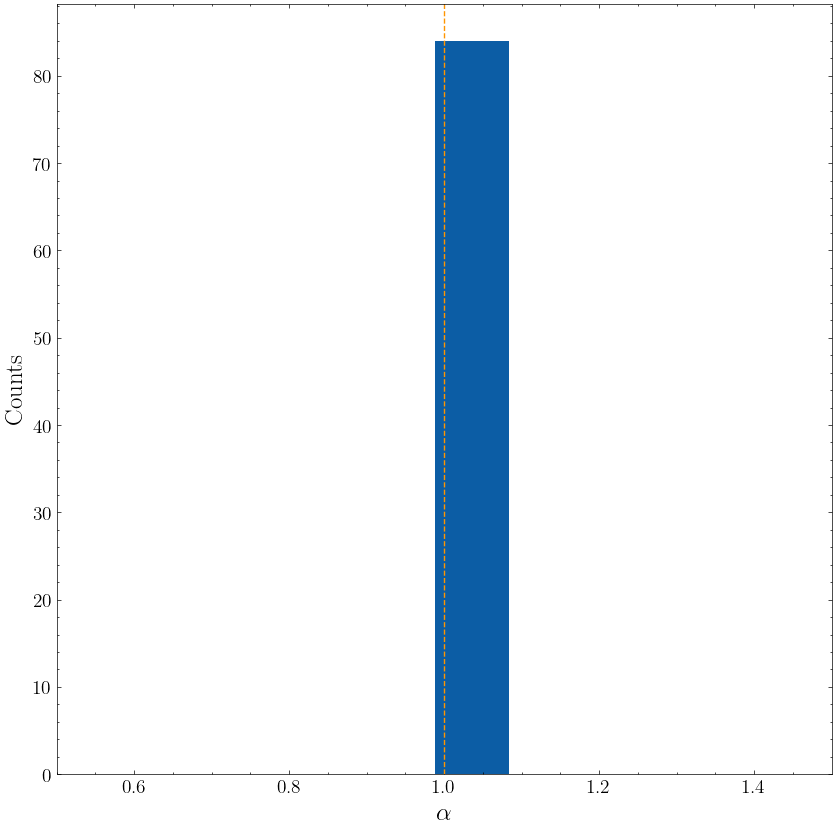

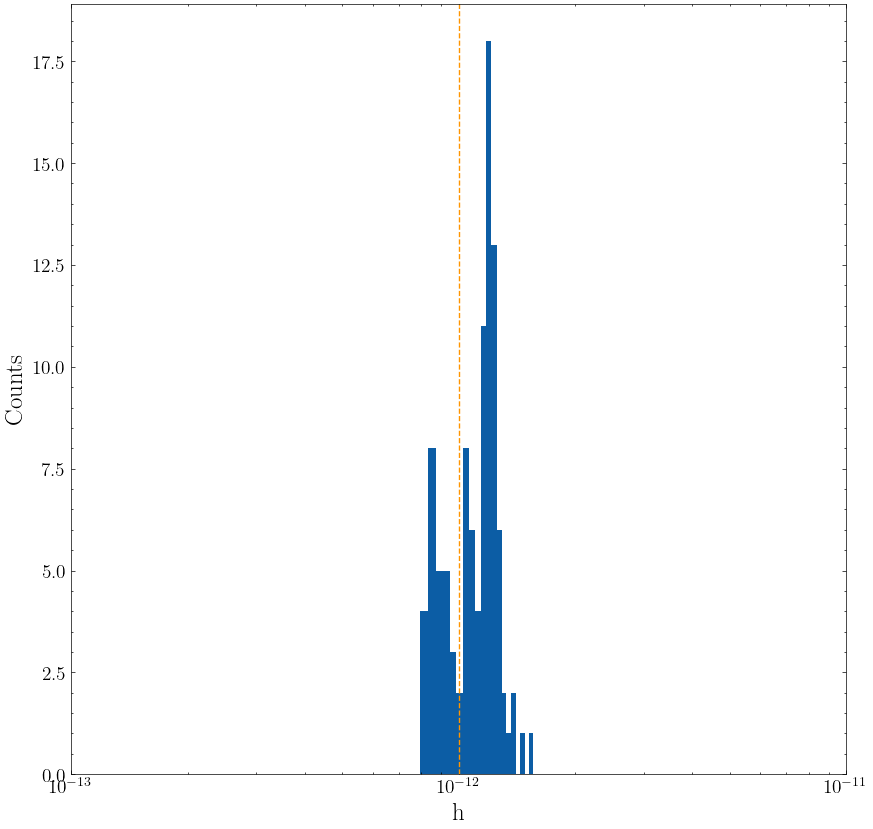

In [ ]:
parameters = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw","h",]
labels = [r'$\omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'h']
injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-12]
ranges=[(1e-9,1e-5),(0.0,0.50),(2.0,3.0),(0.5,1.5),(0.5,1.5),(0.5,1.5),(1e-13,1e-11)]
log_axes_array = [True,False,False,False,False,False,True]

for i in range(len(parameters)):
    single_histogram(df,parameter=parameters[i],label=labels[i],injection_parameter=injection_parameters[i],ranges=ranges[i],log_axes=log_axes_array[i],savefig=f'single_histogram_{parameters[i]}')
